# STAT40800 Data Programming with Python (online)

### Data Analysis Project

### VIVEK MANMOHAN BULANI - 21205992

## 1.  INTRODUCTION

The 2016 Irish Census Data is a collection of various features of the population of Ireland collected in 2016 by the Central Statistics Office (CSO). It is the information of each and every person present in Ireland on Census Night. It is conducted after every 5 years (in the years ending with 1 and 6). It helps the government/organizations to plan different community and national services for the betterment/upliftment of the country. The first fully successful census of Ireland was taken in the year of 1821. At that time, the enumerators used to carry notebooks with them and collect information of every individual. Then in 1841, this pattern was changed by introduction of forms and maps for information collection. This was the first modernisation in Census Data, hence it was also called Grear Census of 1841.

The 2016 Census Data has been divided into a total of 15 themes, where each theme measures a different aspect of the papolation parameter. A few examples of themes are Theme 1: Sex, Age and Marital Status; Theme 2: Migration, Ethnicity, Religion and Foreign Languages; Theme 3: Irish Language and so on. All the themes together measure all the aspects of living of each person in Ireland. Apart from this division of data based on themes, the census data is also divided into 3 geographic levels :- county, electoral area and small area. 

For the following case study, the selected themes of interest are as follows:-

* Theme 2: Migration, Ethnicity, Religion and Foreign Languages
* Theme 3: Irish Language 
* Theme 4: Families 
* Theme 10: Education 

The Theme 2 describes the resident population based on their nationality, birthplace, ethnicity, culture, religion and language spoken. Theme 3 indicates the ability of population aged more than 2 years to speak Irish and their frequency of use of Irish language. Theme 4 measures various aspects of families in Ireland such as the family size, number of children in each family, the age of children in each family, number of parents living in the family. Theme 10 describes the intellectual parameter of the society, which is Eeducation / field of study. Under this theme, people who have ceased their education, who haven't ceased their academics, area/field of study by sex and highest level of education completed are studied.

The primary aim of this research study is to analyse the data from above themes, draw some inferences about the population in terms of above parameters and hence conclude with few possible suggestions for the upliftment of the society. Keeping this in mind, efforts have been made to answer questions such as "identify the trends in terms of field of study" , "understand the structure of families in various electoral areas of Ireland" , "does there exists (linear) relationship between the number of people speaking Irish and the country from where they come from?". To achieve this, initially data preprocessing is performed, followed by regression method such as Linear Regression. Expected results include existence of relationship between nationality/birthplace of person and its ability to speak Irish language.

## 2.  DATA CLEANING / PREPROCESSING

In [1]:
# Import all the necessary modules

import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn import metrics
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
# store file path for importing the data

path = "/Users/vivekbulani/Documents/UCD Sem 1 Modules/UCD Python Module/Final Project/"

In [3]:
# import entire datasets for all 3 geographic levels

census_county = pd.read_csv(path+"Census_by_county.csv", thousands=',')
census_electoral = pd.read_csv(path+"census_by_electoral_area.csv", thousands=',')
#census_small_area = pd.read_csv(path+"Census_by_small_area.csv", thousands=',')

In [4]:
# getting the list of all counties included in census data at county geographic level
census_county[['GEOGDESC']]

,GEOGDESC
0,Cork City
1,Clare
2,Cork County
3,Cavan
4,Carlow
5,Dublin City
6,Donegal
7,D�n Laoghaire-Rathdown
8,Fingal
9,Galway City


#### 2.1 Extracting Table1 of Theme3 i.e Ability to speak Irish - For County level data

In [5]:
Irish_speaking_population = census_county[['GEOGDESC' , 'T3_1YES' , 'T3_1NO' , 'T3_1NS' , 'T3_1T']]

# renaming the column names for better understanding
Irish_speaking_population = Irish_speaking_population.rename(columns={'T3_1YES':'Yes' , 'T3_1NO':'No' , 'T3_1NS':'Not_Stated' , 'T3_1T':'Total' , 'GEOGDESC':'County'})

# setting the index of table to county names
Irish_speaking_population = Irish_speaking_population.set_index('County')

In [6]:
# printing top 5 rows of the table formed

Irish_speaking_population.head()

,Yes,No,Not_Stated,Total
County,,,,
Cork City,44822,72457,4555,121834
Clare,52482,58889,3001,114372
Cork County,179317,211657,8128,399102
Cavan,25210,46003,1657,72870
Carlow,20243,32896,1458,54597


In [7]:
# checking the datatypes of all columns of the tables created

Irish_speaking_population.dtypes

Yes           int64
No            int64
Not_Stated    int64
Total         int64
dtype: object

As all the columns are already of numeric datatype, hence no need of datatype conversion preprocessing.

In [8]:
# checking for presence of null/missing values in the table

Irish_speaking_population.isna().sum()

Yes           0
No            0
Not_Stated    0
Total         0
dtype: int64

Hence there are no missing / NA values in the table.

#### 2.2 Extracting Table1 of Theme2 i.e Resident population by place of birth and nationality - For County level data

In [9]:
Birthplace_and_Nationality = census_county[['GEOGDESC' , 'T2_1IEBP' , 'T2_1UKBP' , 'T2_1PLBP' , 'T2_1LTBP' , 'T2_1EUBP' , 'T2_1RWBP' , 'T2_1TBP' , 'T2_1IEN' , 'T2_1UKN' , 'T2_1PLN' , 'T2_1LTN' , 'T2_1EUN' , 'T2_1RWN' , 'T2_1NSN' , 'T2_1TN']]

# renaming the column names for better understanding
Birthplace_and_Nationality = Birthplace_and_Nationality.rename(columns={'GEOGDESC':'County' , 'T2_1IEBP':'Ireland_Birthplace' , 'T2_1UKBP':'UK_Birthplace' , 'T2_1PLBP':'Poland_Birthplace' , 'T2_1LTBP':'Lithuania_Birthplace' , 'T2_1EUBP':'Other_EU_Birthplace' , 'T2_1RWBP':'Rest_World_Birthplace' , 'T2_1TBP':'Total_Birthplace' , 'T2_1IEN':'Ireland_Nationality' , 'T2_1UKN':'UK_Nationality' , 'T2_1PLN':'Poland_Nationality' , 'T2_1LTN':'Lithuania_Nationality' , 'T2_1EUN':'Other_EU_Nationality' , 'T2_1RWN':'Rest_World_Nationality' , 'T2_1NSN':'Not_Stated_Nationality' , 'T2_1TN':'Total_Nationality'})

# setting the index of table to county names
Birthplace_and_Nationality = Birthplace_and_Nationality.set_index('County')

In [10]:
# printing top 5 rows of the table formed

Birthplace_and_Nationality.head()

,Ireland_Birthplace,UK_Birthplace,Poland_Birthplace,Lithuania_Birthplace,Other_EU_Birthplace,Rest_World_Birthplace,Total_Birthplace,Ireland_Nationality,UK_Nationality,Poland_Nationality,Lithuania_Nationality,Other_EU_Nationality,Rest_World_Nationality,Not_Stated_Nationality,Total_Nationality
County,,,,,,,,,,,,,,,
Cork City,100145,5092,3066,448,6461,7807,123019,103962,1856,3232,466,6580,5049,1874,123019
Clare,98420,7616,2684,333,2424,4983,116460,103829,3127,2844,362,2435,2302,1561,116460
Cork County,352452,22176,12378,2094,9967,13759,412826,366614,10774,13060,2254,9544,6218,4362,412826
Cavan,62173,5414,2009,1301,1717,2706,75320,65609,2041,2189,1433,1755,1396,897,75320
Carlow,48368,2588,2121,231,1443,1725,56476,49654,1107,2277,239,1438,871,890,56476


In [11]:
# checking the datatypes of all columns of the tables created

Birthplace_and_Nationality.dtypes

Ireland_Birthplace        int64
UK_Birthplace             int64
Poland_Birthplace         int64
Lithuania_Birthplace      int64
Other_EU_Birthplace       int64
Rest_World_Birthplace     int64
Total_Birthplace          int64
Ireland_Nationality       int64
UK_Nationality            int64
Poland_Nationality        int64
Lithuania_Nationality     int64
Other_EU_Nationality      int64
Rest_World_Nationality    int64
Not_Stated_Nationality    int64
Total_Nationality         int64
dtype: object

As all the columns are already of numeric datatype, hence no need of datatype conversion preprocessing.

In [12]:
# checking for presence of null/missing values in the table

Birthplace_and_Nationality.isna().sum() 

Ireland_Birthplace        0
UK_Birthplace             0
Poland_Birthplace         0
Lithuania_Birthplace      0
Other_EU_Birthplace       0
Rest_World_Birthplace     0
Total_Birthplace          0
Ireland_Nationality       0
UK_Nationality            0
Poland_Nationality        0
Lithuania_Nationality     0
Other_EU_Nationality      0
Rest_World_Nationality    0
Not_Stated_Nationality    0
Total_Nationality         0
dtype: int64

Hence there are no missing / NA values in the table.

#### 2.3 Extracting Table3 of Theme10 i.e Field of Study of different Individuals - For Electoral level data 

In [13]:
Education_background = census_electoral[['GEOGDESC', 'T10_3_EDUM', 'T10_3_ARTM', 'T10_3_HUMM', 'T10_3_SOCM', 'T10_3_SCIM', 'T10_3_ENGM', 'T10_3_AGRM', 'T10_3_HEAM', 'T10_3_SERM', 'T10_3_OTHM', 'T10_3_NSM', 'T10_3_TM', 'T10_3_EDUF', 'T10_3_ARTF', 'T10_3_HUMF', 'T10_3_SOCF', 'T10_3_SCIF', 'T10_3_ENGF', 'T10_3_AGRF', 'T10_3_HEAF', 'T10_3_SERF', 'T10_3_OTHF', 'T10_3_NSF', 'T10_3_TF', 'T10_3_NST', 'T10_3_TT']]

# renaming the column names for better understanding
Education_background = Education_background.rename(columns={'GEOGDESC':'Electoral_Area', 'T10_3_EDUM':'Education_teacher_training_Males', 'T10_3_ARTM':'Arts_Males', 'T10_3_HUMM':'Humanities_Males', 'T10_3_SOCM':'Social_sciences_business_law_Males', 'T10_3_SCIM':'Science_mathematics_computing_Males', 'T10_3_ENGM':'Engineering_manufacturing_construction_Males', 'T10_3_AGRM':'Agriculture_veterinary_Males', 'T10_3_HEAM':'Health_welfare_Males', 'T10_3_SERM':'Services_Males', 'T10_3_OTHM':'Other_Males', 'T10_3_NSM':'Not_Stated_Males', 'T10_3_TM':'Total_Males', 'T10_3_EDUF':'Education_teacher_training_Females', 'T10_3_ARTF':'Arts_Females', 'T10_3_HUMF':'Humanities_Females', 'T10_3_SOCF':'Social_sciences_business_law_Females', 'T10_3_SCIF':'Science_mathematics_computing_Females', 'T10_3_ENGF':'Engineering_manufacturing_construction_Females', 'T10_3_AGRF':'Agriculture_veterinary_Females', 'T10_3_HEAF':'Health_welfare_Females', 'T10_3_SERF':'Services_Females', 'T10_3_OTHF':'Other_Females', 'T10_3_NSF':'Not_Stated_Females', 'T10_3_TF':'Total_Females', 'T10_3_NST':"Not_Stated_Total", 'T10_3_TT':'Total'})

# setting the index of table to Electoral Area name
Education_background = Education_background.set_index('Electoral_Area')

In [14]:
# printing top 5 rows of the table formed

Education_background.head()

,Education_teacher_training_Males,Arts_Males,Humanities_Males,Social_sciences_business_law_Males,Science_mathematics_computing_Males,Engineering_manufacturing_construction_Males,Agriculture_veterinary_Males,Health_welfare_Males,Services_Males,Other_Males,...,Science_mathematics_computing_Females,Engineering_manufacturing_construction_Females,Agriculture_veterinary_Females,Health_welfare_Females,Services_Females,Other_Females,Not_Stated_Females,Total_Females,Not_Stated_Total,Total
Electoral_Area,,,,,,,,,,,,,,,,,,,,,
Adare - Rathkeale,156,84,96,762,339,1812,706,161,262,7,...,350,120,122,1296,440,9,4499,9269,9216,18371
Ardee,132,118,68,703,358,1828,468,244,284,9,...,286,126,92,1381,554,10,4570,9273,9639,18554
Arklow,87,164,99,694,386,1383,427,132,256,10,...,310,102,104,1001,458,14,4372,8524,9167,16957
Ashbourne,143,183,168,1066,444,1757,426,172,356,7,...,305,156,94,1120,618,15,4226,9384,8557,18437
Athenry - Oranmore,250,127,173,1227,810,2335,518,254,385,14,...,621,219,81,1628,656,14,4211,11200,8975,22057


In [15]:
# checking the datatypes of all columns of the tables created

Education_background.dtypes

Education_teacher_training_Males                  int64
Arts_Males                                        int64
Humanities_Males                                  int64
Social_sciences_business_law_Males                int64
Science_mathematics_computing_Males               int64
Engineering_manufacturing_construction_Males      int64
Agriculture_veterinary_Males                      int64
Health_welfare_Males                              int64
Services_Males                                    int64
Other_Males                                       int64
Not_Stated_Males                                  int64
Total_Males                                       int64
Education_teacher_training_Females                int64
Arts_Females                                      int64
Humanities_Females                                int64
Social_sciences_business_law_Females              int64
Science_mathematics_computing_Females             int64
Engineering_manufacturing_construction_Females  

As all the columns are already of numeric datatype, hence no need of datatype conversion preprocessing.

In [16]:
# checking for presence of null/missing values in the table

Education_background.isna().sum()

Education_teacher_training_Males                  0
Arts_Males                                        0
Humanities_Males                                  0
Social_sciences_business_law_Males                0
Science_mathematics_computing_Males               0
Engineering_manufacturing_construction_Males      0
Agriculture_veterinary_Males                      0
Health_welfare_Males                              0
Services_Males                                    0
Other_Males                                       0
Not_Stated_Males                                  0
Total_Males                                       0
Education_teacher_training_Females                0
Arts_Females                                      0
Humanities_Females                                0
Social_sciences_business_law_Females              0
Science_mathematics_computing_Females             0
Engineering_manufacturing_construction_Females    0
Agriculture_veterinary_Females                    0
Health_welfa

Hence there are no missing / NA values in the table.

#### 2.4 Extracting Table1 of Theme4 i.e Families by size of Family - For Electoral level data 

In [17]:
Family_size =  census_electoral[['GEOGDESC', 'T4_1_2PF', 'T4_1_3PF', 'T4_1_4PF', 'T4_1_5PF', 'T4_1_GRE_6PF', 'T4_1_TF']]

# renaming the column names for better understanding
Family_size = Family_size.rename(columns={'GEOGDESC':'Electoral_Area', 'T4_1_2PF':'2_persons', 'T4_1_3PF':'3_persons', 'T4_1_4PF':'4_persons', 'T4_1_5PF':'5_persons', 'T4_1_GRE_6PF':'6_or_more_persons', 'T4_1_TF':'Total_persons'})

# setting the index of table to Electoral Area name
Family_size = Family_size.set_index('Electoral_Area')

In [18]:
# printing top 5 rows of the table formed

Family_size.head()

,2_persons,3_persons,4_persons,5_persons,6_or_more_persons,Total_persons
Electoral_Area,,,,,,
Adare - Rathkeale,2783,1546,1746,994,363,7432
Ardee,2714,1713,1890,1047,375,7739
Arklow,2750,1633,1560,790,306,7039
Ashbourne,2562,1775,2055,990,318,7700
Athenry - Oranmore,3254,1962,2341,1288,474,9319


In [19]:
# checking the datatypes of all columns of the tables created

Family_size.dtypes

2_persons            int64
3_persons            int64
4_persons            int64
5_persons            int64
6_or_more_persons    int64
Total_persons        int64
dtype: object

As all the columns are already of numeric datatype, hence no need of datatype conversion preprocessing.

In [20]:
# checking for presence of null/missing values in the table

Family_size.isna().sum()

2_persons            0
3_persons            0
4_persons            0
5_persons            0
6_or_more_persons    0
Total_persons        0
dtype: int64

Hence there are no missing / NA values in the table.

## 3.  EXPLORATORY DATA ANALYSIS

#### 3.1 Analysing Irish_speaking_population table 

In [21]:
# printing the summary statistics of the tables (such as minimum, maximum, mean, median, quantiles, etc) 

Irish_speaking_population.describe()

,Yes,No,Not_Stated,Total
count,31.000000,31.000000,31.000000,31.000000
mean,56820.000000,86062.741935,4512.774194,147395.516129
std,38287.421603,65723.586516,6140.336205,107344.901889
min,12300.000000,17676.000000,795.000000,30771.000000
25%,29473.500000,45443.500000,1783.500000,75238.000000
50%,49955.000000,72457.000000,3117.000000,123406.000000
75%,74538.000000,98281.500000,4468.500000,179035.500000
max,179317.000000,344099.000000,35244.000000,535779.000000


<AxesSubplot:>

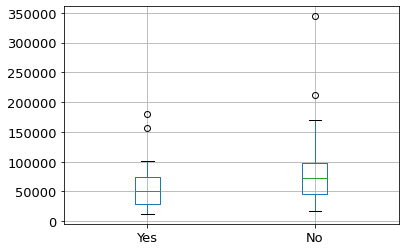

In [22]:
Irish_speaking_population.boxplot(column=["Yes","No"], fontsize=13)

<AxesSubplot:>

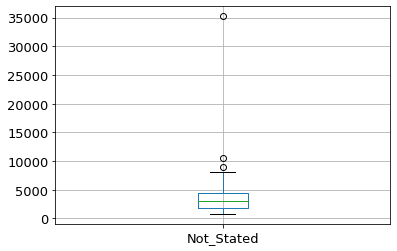

In [23]:
Irish_speaking_population.boxplot(column="Not_Stated", fontsize=13)

<AxesSubplot:>

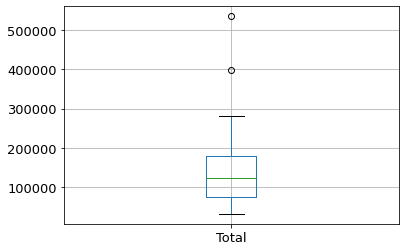

In [24]:
Irish_speaking_population.boxplot(column="Total", fontsize=13)

In [25]:
Irish_speaking_population[Irish_speaking_population['Yes']>150000]

,Yes,No,Not_Stated,Total
County,,,,
Cork County,179317,211657,8128,399102
Dublin City,156436,344099,35244,535779


In [26]:
(Irish_speaking_population['Yes']/Irish_speaking_population['Total']).sort_values(ascending=False)

County
Galway County                0.489917
Clare                        0.458871
Cork County                  0.449301
Mayo                         0.438573
Kerry                        0.431929
Tipperary                    0.426829
Roscommon                    0.416351
Limerick City and County     0.412975
Galway City                  0.410823
Kilkenny                     0.407026
Waterford City and County    0.405568
Kildare                      0.402044
Laois                        0.401486
Leitrim                      0.399727
Sligo                        0.399296
D�n Laoghaire-Rathdown       0.396350
Meath                        0.385605
Westmeath                    0.379050
Monaghan                     0.376080
Offaly                       0.372364
Donegal                      0.370902
Carlow                       0.370771
Cork City                    0.367894
Wicklow                      0.365625
Longford                     0.359174
Fingal                       0.358446
Wexfo

* From above outputs of describe( ) and boxplots, we can see that minimum number of people who speak Irish in any county is 12300 and maximum is 179317 (which is for County Cork). Second highest area with largest number of Irish speaking population is Dublin City.

* If we check the proportion of people who speak Irish in each county, then we see Galway has the highest proportion with approximately 50% people staying there speaking Irish. Dublin City has the lowest with only approx 30% people speaking Irish. This might be because most of the foreigners who come to Ireland stay in Dublin City. Hence despite being largely populated, it has not highest number of Irish speaking individuals. Rather there maybe high mixture of people from different countries.

* 25% counties have less than 29473 Irish speaking population. and 75% counties have less than 74538 Irish speaking people.

* As compared to number of individuals either speaking Irish or not, there are considerable amount of people whose status for Irish speaking is not stated. This might be because maybe people don't want to tell whether they know Irish or not.

Text(0.5, 1.0, 'Histogram of Irish Speaking Population in different County regions')

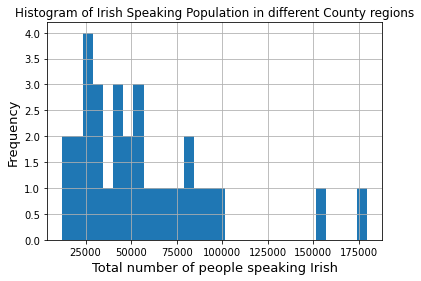

In [27]:
Irish_speaking_population['Yes'].hist(bins=30)
plt.xlabel("Total number of people speaking Irish",size=13)
plt.ylabel("Frequency",size=13)
plt.title("Histogram of Irish Speaking Population in different County regions")

From above histogram, we can see that Total Irish speaking population has a Right Skewed Distribution with 2 extreme outliers on right. 

#### 3.2 Analysing Birthplace_and_Nationality table  

In [28]:
# printing the summary statistics of the tables (such as minimum, maximum, mean, median, quantiles, etc) 

Birthplace_and_Nationality.describe()

,Ireland_Birthplace,UK_Birthplace,Poland_Birthplace,Lithuania_Birthplace,Other_EU_Birthplace,Rest_World_Birthplace,Total_Birthplace,Ireland_Nationality,UK_Nationality,Poland_Nationality,Lithuania_Nationality,Other_EU_Nationality,Rest_World_Nationality,Not_Stated_Nationality,Total_Nationality
count,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000
mean,125145.645161,8942.129032,3714.870968,1075.612903,4686.516129,7723.000000,151287.774194,131693.967742,3326.225806,3952.096774,1179.096774,4733.483871,4082.483871,2320.419355,151287.774194
std,87702.414023,5691.959597,2911.176208,906.292619,6349.529746,9564.325852,109156.089625,90689.236672,2100.116468,3084.010391,996.065605,6605.923250,6325.404830,3024.735501,109156.089625
min,25901.000000,2507.000000,758.000000,160.000000,655.000000,897.000000,31715.000000,27767.000000,995.000000,829.000000,177.000000,643.000000,362.000000,435.000000,31715.000000
25%,65097.500000,5071.000000,1976.000000,445.000000,1607.500000,2711.000000,76631.000000,67690.000000,1821.500000,2151.500000,470.000000,1648.500000,1233.500000,1009.000000,76631.000000
50%,103235.000000,8352.000000,2684.000000,763.000000,2815.000000,4946.000000,127762.000000,113042.000000,3127.000000,2844.000000,841.000000,2705.000000,2316.000000,1678.000000,127762.000000
75%,157679.000000,10789.000000,3904.000000,1424.000000,4408.000000,7669.500000,184946.000000,165828.000000,4343.000000,4152.500000,1563.000000,4437.500000,4341.500000,2074.500000,184946.000000
max,419158.000000,25481.000000,12378.000000,3474.000000,34072.000000,49172.000000,537190.000000,428146.000000,10774.000000,13060.000000,3815.000000,35705.000000,35300.000000,17224.000000,537190.000000


<AxesSubplot:>

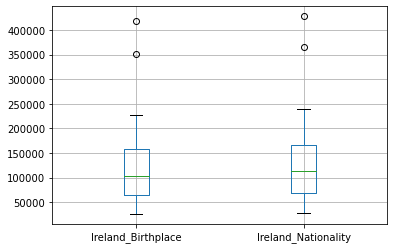

In [29]:
Birthplace_and_Nationality.boxplot(column=['Ireland_Birthplace', 'Ireland_Nationality'])

<AxesSubplot:>

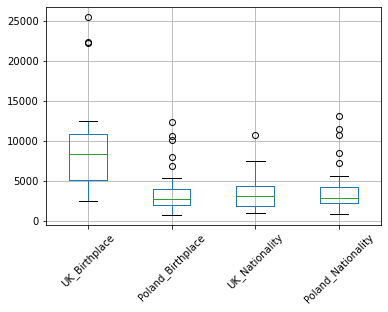

In [30]:
Birthplace_and_Nationality.boxplot(column=['UK_Birthplace', 'Poland_Birthplace', 'UK_Nationality', 'Poland_Nationality'], rot=45)

<AxesSubplot:>

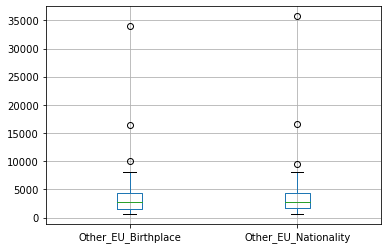

In [31]:
Birthplace_and_Nationality.boxplot(column=['Other_EU_Birthplace', 'Other_EU_Nationality'])

In [32]:
(Birthplace_and_Nationality['Ireland_Birthplace']/Birthplace_and_Nationality['Total_Birthplace']).sort_values(ascending=False)

County
Offaly                       0.876900
Kilkenny                     0.872000
Wexford                      0.870983
Tipperary                    0.869625
Limerick City and County     0.858836
Laois                        0.858760
Carlow                       0.856435
Galway County                0.854448
Cork County                  0.853754
Waterford City and County    0.852609
Wicklow                      0.850526
Meath                        0.847574
Clare                        0.845097
Sligo                        0.841635
Roscommon                    0.840547
Kildare                      0.839096
Westmeath                    0.836991
Kerry                        0.835166
Mayo                         0.830350
Cavan                        0.825451
South Dublin                 0.825035
Leitrim                      0.816680
Cork City                    0.814061
D�n Laoghaire-Rathdown       0.810982
Louth                        0.808026
Longford                     0.805116
Monag

In [33]:
(Birthplace_and_Nationality['Rest_World_Birthplace']/Birthplace_and_Nationality['Total_Birthplace']).sort_values(ascending=False)

County
Dublin City                  0.091536
Galway City                  0.087950
Fingal                       0.086047
D�n Laoghaire-Rathdown       0.078822
South Dublin                 0.073562
Cork City                    0.063462
Westmeath                    0.050494
Kildare                      0.049629
Louth                        0.049005
Limerick City and County     0.044380
Waterford City and County    0.043143
Longford                     0.042848
Clare                        0.042787
Wicklow                      0.039983
Meath                        0.038941
Laois                        0.038675
Sligo                        0.036474
Cavan                        0.035927
Kerry                        0.035208
Galway County                0.034568
Roscommon                    0.034531
Cork County                  0.033329
Carlow                       0.030544
Mayo                         0.028685
Leitrim                      0.028283
Kilkenny                     0.027679
Monag

In [34]:
Birthplace_and_Nationality[Birthplace_and_Nationality['Ireland_Birthplace']>250000].sort_values(ascending=False, by='Ireland_Birthplace')

,Ireland_Birthplace,UK_Birthplace,Poland_Birthplace,Lithuania_Birthplace,Other_EU_Birthplace,Rest_World_Birthplace,Total_Birthplace,Ireland_Nationality,UK_Nationality,Poland_Nationality,Lithuania_Nationality,Other_EU_Nationality,Rest_World_Nationality,Not_Stated_Nationality,Total_Nationality
County,,,,,,,,,,,,,,,
Dublin City,419158,22307,10116,2365,34072,49172,537190,428146,7515,10712,2588,35705,35300,17224,537190
Cork County,352452,22176,12378,2094,9967,13759,412826,366614,10774,13060,2254,9544,6218,4362,412826


In [35]:
Birthplace_and_Nationality[Birthplace_and_Nationality['UK_Birthplace']>20000].sort_values(ascending=False, by='UK_Birthplace')

,Ireland_Birthplace,UK_Birthplace,Poland_Birthplace,Lithuania_Birthplace,Other_EU_Birthplace,Rest_World_Birthplace,Total_Birthplace,Ireland_Nationality,UK_Nationality,Poland_Nationality,Lithuania_Nationality,Other_EU_Nationality,Rest_World_Nationality,Not_Stated_Nationality,Total_Nationality
County,,,,,,,,,,,,,,,
Donegal,123229,25481,1858,308,1485,3808,156169,142681,5853,2012,345,1435,1832,2011,156169
Dublin City,419158,22307,10116,2365,34072,49172,537190,428146,7515,10712,2588,35705,35300,17224,537190
Cork County,352452,22176,12378,2094,9967,13759,412826,366614,10774,13060,2254,9544,6218,4362,412826


* From above outputs of describe( ) and boxplots, we can see that minimum number of people(in any county) who are born in Ireland is 25901 and maximum is 419158 (which is for Dublin City). Second highest area with largest number of Irish born population is Cork County.

* Also if we see then Dublin City ranks second in number of people who are born in UK followed by Cork County.

* In terms of Other_EU population (i.e individuals who are from outside EU), Dublin City again has highest number of such people.

* Hence from all this, we can say that Dublin City has mixture of both Irish as well as Outside country population.

* Now if we compare the proportion of people who are born in Ireland, we see that County Offaly has highest number of Irish people (approx 88%) and Galway City has lowest (approx 74%). Dublin City also had very low proportion of Irish individuals (approx 78%).

* If we compare the proportion of people in different counties who have came from Rest of the World, Dublin City has highest (approx 10%) (The same result/conclusion was made above while analysing Irish_speaking_population table). Galway City ranks two with approx 0.9%.

* From the output of boxplots derived above, we can infer that Ireland_Birthplace is slightly deviated from normal distribution, it is slightly Right Skewed data. But Ireland_Nationality is almost normally distributed.

* In general there are not much outliers for any column(maximum 5). So most of the data in the table follows the general trend.

* There are considerable amount of people for whom Nationality is not stated/recorded. Hence efforts and care must be taken to keep the record of nationality of every individual.


#### 3.3 Analysing Education_background table  

In [36]:
(Education_background['Not_Stated_Total']/Education_background['Total']).sort_values(ascending=False)

Electoral_Area
Cork City North West       0.711874
Waterford City South       0.665191
Cork City North Central    0.630074
Stranorlar                 0.628773
Beaumont-Donaghmede        0.617156
                             ...   
Galway City West           0.318695
Glencullen - Sandyford     0.300035
Blackrock                  0.262314
Rathgar - Rathmines        0.259578
Stillorgan                 0.253634
Length: 137, dtype: float64

In [37]:
((Education_background['Not_Stated_Total']/Education_background['Total'])>0.5).sum()

87

From above output, we see that there is considerably high amount of people for whom the area of study is not stated/recorded.

For example Cork City North West area has highest proportion of "Not_Stated" value (approx 71%). In total, 87 areas have "Not_Stated" proportion of population greater than 50%. This depicts lack of information in this particular aspect.

In [38]:
labels = ['Education_teacher_training', 'Arts', 'Humanities', 'Social_sciences_business_law', 'Science_mathematics_computing', 'Engineering_manufacturing_construction', 'Agriculture_veterinary', 'Health_welfare', 'Services', 'Other']
males = Education_background.iloc[:, 0:10].loc['Dundrum']
females = Education_background.iloc[:, 12:22].loc['Dundrum']

In [39]:
x = np.arange(1,len(labels)+1)

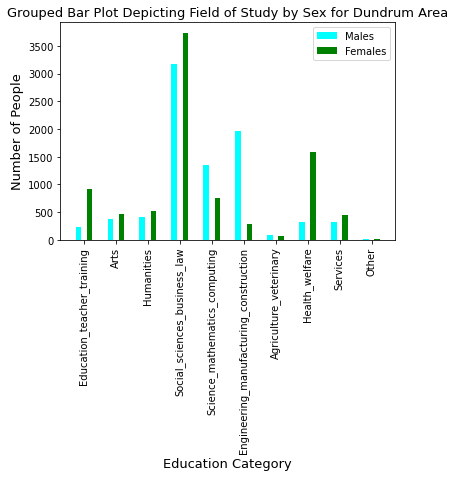

In [40]:
width = 0.175

# plot data in grouped manner of bar type
plt.bar(x-width, males, width, color='cyan')
plt.bar(x+width, females, width, color='green')
plt.xticks(x, labels, size=10, rotation=90)
plt.xlabel("Education Category", size=13)
plt.ylabel("Number of People", size=13)
plt.legend(["Males", "Females"])
plt.title("Grouped Bar Plot Depicting Field of Study by Sex for Dundrum Area", size=13)
plt.show()

From above grouped bar chart, we can clearly see that in Dundrum electoral area, highest number of individuals are from "Social Sciences, Business and Law" field. For females, the second highest sector is "Health and Welfare" closely followed by "Education, Teacher and Training" sector. Whereas for males, the second most popular sector is "Engineering, manufacturing and construction" sector closely followed by "Science, mathematics and computing". 

In general we can see that in most of the fields, female population is more compared to male.

#### 3.4 Analysing Family_size table

<AxesSubplot:>

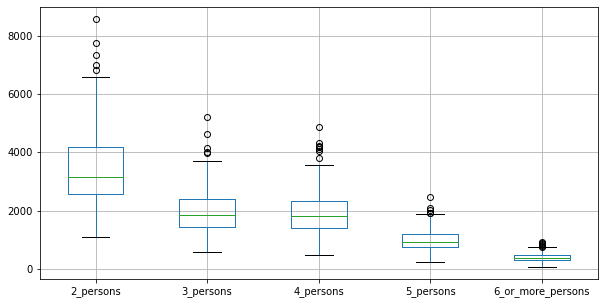

In [41]:
Family_size.boxplot(column=['2_persons','3_persons','4_persons','5_persons','6_or_more_persons'],figsize=(10,5))

From above boxplot we can infer that in most of the electoral areas, large number of people live in pairs (family size = 2). Proportion of population living with family size 3 and 4 are almost same. There are very few people who live in large  families (comprising of 6 persons or more).

In [42]:
x=[3,7,10,12,14]
y=[4,5,8,11,13]
s=Family_size.loc['Dundrum'].iloc[0:5]

In [43]:
s.values

array([4518, 2080, 1976,  935,  266])

(0.0, 15.0)

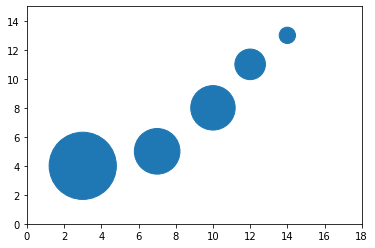

In [44]:
plt.scatter(x,y,s=s.values)
plt.xlim(0,18)
plt.ylim(0,15)

From above plot, we can see the size of the circle is proportional to number of families of each family size type. Hence for family size = 2, we have largest cricle indicating that there are highest number of families having family size = 2. The circles for family size 3 and 4 are almost same. The smallest is for 6/more persons in family.

## 4.  STATISTICAL ANALYSIS

### 4.1 Identifying if there is any Linear Relationship between ability to speak Irish Langugage and Nationality / Birthplace 

In [45]:
# concatenate the two tables created above i.e Irish_speaking_population and Birthplace_and_Nationality
# concatenation is done using inner join (on county index)

Irish_and_Nationality_merged = pd.concat([Irish_speaking_population , Birthplace_and_Nationality], axis=1, join="inner")

In [46]:
# print top 5 rows of the merged data

Irish_and_Nationality_merged.head()

,Yes,No,Not_Stated,Total,Ireland_Birthplace,UK_Birthplace,Poland_Birthplace,Lithuania_Birthplace,Other_EU_Birthplace,Rest_World_Birthplace,Total_Birthplace,Ireland_Nationality,UK_Nationality,Poland_Nationality,Lithuania_Nationality,Other_EU_Nationality,Rest_World_Nationality,Not_Stated_Nationality,Total_Nationality
County,,,,,,,,,,,,,,,,,,,
Cork City,44822,72457,4555,121834,100145,5092,3066,448,6461,7807,123019,103962,1856,3232,466,6580,5049,1874,123019
Clare,52482,58889,3001,114372,98420,7616,2684,333,2424,4983,116460,103829,3127,2844,362,2435,2302,1561,116460
Cork County,179317,211657,8128,399102,352452,22176,12378,2094,9967,13759,412826,366614,10774,13060,2254,9544,6218,4362,412826
Cavan,25210,46003,1657,72870,62173,5414,2009,1301,1717,2706,75320,65609,2041,2189,1433,1755,1396,897,75320
Carlow,20243,32896,1458,54597,48368,2588,2121,231,1443,1725,56476,49654,1107,2277,239,1438,871,890,56476


In [47]:
# find the correlation of all columns with "Yes" colummn (i.e with number of people who speak Irish).
# then sort the values in decreasing order to identify the columns which are highly related to our column of interest.

Irish_and_Nationality_merged.corr()['Yes'].abs().sort_values(ascending = False)

Yes                       1.000000
Ireland_Nationality       0.977866
Ireland_Birthplace        0.975870
Total_Birthplace          0.964501
Total_Nationality         0.964501
Total                     0.960757
No                        0.919764
Poland_Birthplace         0.911319
Poland_Nationality        0.906862
UK_Nationality            0.887201
UK_Birthplace             0.787767
Rest_World_Birthplace     0.765312
Other_EU_Birthplace       0.747162
Other_EU_Nationality      0.732329
Not_Stated_Nationality    0.726767
Not_Stated                0.715718
Rest_World_Nationality    0.690417
Lithuania_Birthplace      0.545326
Lithuania_Nationality     0.538262
Name: Yes, dtype: float64

##### Building a Linear Model using OLS

In [48]:
# pick top few columns/predictors having high correlation with response variable ("Yes")
data = Irish_and_Nationality_merged[['Ireland_Nationality' , 'Ireland_Birthplace' , 'Poland_Birthplace' , 'Poland_Nationality' , 'UK_Nationality' , 'UK_Birthplace' , 'Rest_World_Birthplace', 'Other_EU_Birthplace' , 'Other_EU_Nationality']]

# necessary to prepend column of 1's to X in order to consider the intercept term
data = sm.add_constant(data)

# defining the response variable
target = Irish_and_Nationality_merged['Yes']

# performing the splitting of entire data into training and testing data in the ratio of 80:20
# to prevent overfitting and to effectively evaluate the model performance.
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=0) 

In [49]:
# fit / train the model on training data

mod = sm.OLS(y_train, X_train, axis=1).fit()

In [50]:
# print all the estimated coefficient values (i.e intercept term and slope parameter for all variables)

mod.params

const                    1913.798858
Ireland_Nationality         0.723051
Ireland_Birthplace         -0.399089
Poland_Birthplace          34.712417
Poland_Nationality        -31.083436
UK_Nationality              3.140699
UK_Birthplace              -0.666767
Rest_World_Birthplace      -0.246801
Other_EU_Birthplace         2.848607
Other_EU_Nationality       -2.766078
dtype: float64

Hence our equation is of the form :-

Irish_Yes = β0 + β1 * (Ireland_nationality) + β2 * (Ireland_Birthplace) + β3 * (Poland_Birthplace) + β4 * (Poland_Nationality) + β5 * (UK_Nationality) + β6 * (UK_Birthplace) + β7 * (Rest_World_Birthplace) + β8 * (Other_EU_Birthplace) + β9 * (Other_EU_Nationality)

As per above estimated values for coefficients, we can say that if Ireland_nationality increases by 100 units(people) then number of Irish speaking individuals increases by approximately 72 people. Similarly, for increase in people born in Poland by 100 units, we expect increase in Irish spreaking individuals by approximately 3471.

In [51]:
# use the fitted model to predict for testing data

y_pred = mod.predict(X_test) 

In [52]:
# get the MSE, RMSE values for testing data

print("Mean Square Error =",metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error =",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Square Error = 59883888.68749032
Root Mean Squared Error = 7738.468109870992


### 4.2 Performing Hypothesis Testing

In [53]:
# obtain the 95% confidence intervals for all the estimated coefficients

mod.conf_int()

,0,1
const,-3268.197748,7095.795463
Ireland_Nationality,-1.460367,2.906470
Ireland_Birthplace,-2.569688,1.771510
Poland_Birthplace,-20.278529,89.703362
Poland_Nationality,-81.324584,19.157712
UK_Nationality,-2.163622,8.445020
UK_Birthplace,-3.275446,1.941912
Rest_World_Birthplace,-1.879151,1.385550
Other_EU_Birthplace,-25.761713,31.458927
Other_EU_Nationality,-30.292788,24.760632


The confidence intervals can be interpreted as follows :-
If the population from which this sample was drawn was sampled 100 times then approximately 95 of those confidence intervals would contain the "true" coefficient (i.e coefficient lies in that interval)

In [54]:
# obatin the p-values for all estimated coefficients.
# these values simply represent the probability that the coefficient is actually zero 

mod.pvalues

const                    0.441515
Ireland_Nationality      0.489207
Ireland_Birthplace       0.699269
Poland_Birthplace        0.197230
Poland_Nationality       0.205763
UK_Nationality           0.224811
UK_Birthplace            0.592190
Rest_World_Birthplace    0.750522
Other_EU_Birthplace      0.833979
Other_EU_Nationality     0.832468
dtype: float64

These p-values can now be used for hypothesis testing for each coefficient where

H0 (null hypothesis) : the predictor variable is insignificant (i.e βi = 0) and

Ha (alternative hypothesis) : the predictor variable is significant (i.e βi != 0)


In [55]:
# obtain the R-squared value of the model.

mod.rsquared 

0.9887914376770048

It tells the proportion of variance explained by the model. It lies in the interval [0,1].
Closer the R-squared value to 1, better is the model because it means that more variance is explained by the model

In [56]:
# print the entire summary of the linear model

mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Yes   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     137.2
Date:                Mon, 20 Dec 2021   Prob (F-statistic):           4.36e-12
Time:                        04:23:19   Log-Likelihood:                -229.77
No. Observations:                  24   AIC:                             479.5
Df Residuals:                      14   BIC:                             491.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1913.7989   2416.090      0.792      0.442   -3268.198    7095.795
Ireland_Nationality       0.7231      1.018      0.710      0.489      -1.460       2.906
Ireland_Birthplace       -0.3991      1.012     -0.394      0.699      -2.570       1.772
Poland_Birthplace        34.7124     25.639      1.354      0.197     -20.279      89.703
Poland_Nationality      -31.0834     23.425     -1.327      0.206     -81.325      19.158
UK_Nationality            3.1407      2.473      1.270      0.225      -2.164       8.445
UK_Birthplace            -0.6668      1.216     -0.548      0.592      -3.275       1.942
Rest_World_Birthplace    -0.2468      0.761     -0.324      0.751      -1.879       1.386
Other_EU_Birthplace       2.8486     13.339      0.214      0.834     -25.762      31.459
Other_EU_Nationality     -2.7661     12.834     -0.216      0.832     -30.293      24.761
==============================================================================
Omnibus:                        2.769   Durbin-Watson:                   2.111
Prob(Omnibus):                  0.250   Jarque-Bera (JB):                1.312
Skew:                          -0.486   Prob(JB):                        0.519
Kurtosis:                       3.606   Cond. No.                     5.58e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.58e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

From all the above results, we can infer following information :-

* By looking at the estimated values of coefficients (β's), we can clearly say that interpreting these estimated values is pointless. For example, there is a negative value for coefficient of Ireland_Birthplace. But logically this seems to be incorrect as it is highly impossible that people who are born in Ireland don't know to speak Irish.

* Secondly the mean squared error (MSE) and root mean squared error (RMSE) values for testing data are very high.

* Thirdly the p-values for all variables are high (greater than 0.05). Hence this says that none of the predictor variables are significant in determining the number of Irish speaking population. This seems to be logically incorrect.

* Also the value for R-squared and adjusted R-squared are very high (near to 1). This says that almost all of the variance is explained by the model.

* After analysing all these statistical information,  we can finally infer that the model mentioned above explains a lot of variation within the data but is not significant (model is worthless).


### 4.3 Testing assumptions of Linear Regression

##### Linearity Assumption 

* It states that there must be a linear relationship between the response variable and each predictor variable.

* This assumption can be checked by plotting the component residual plots and added variable plots.

Figure(432x288)


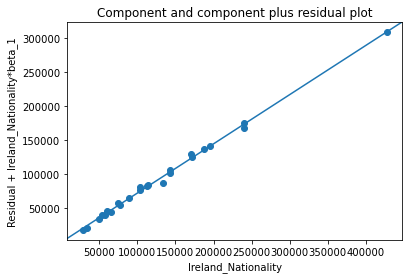

In [57]:
print(sm.graphics.plot_ccpr(mod, "Ireland_Nationality"))

Figure(432x288)


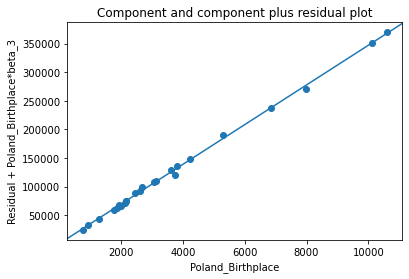

In [58]:
print(sm.graphics.plot_ccpr(mod, "Poland_Birthplace"))

Figure(432x288)


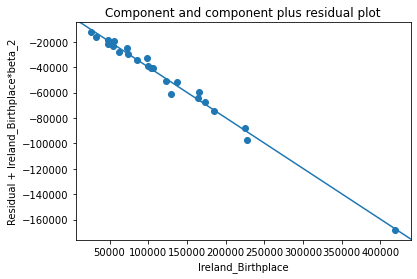

In [59]:
print(sm.graphics.plot_ccpr(mod, "Ireland_Birthplace"))

From all the above plots (and similarly plotting for rest of the variables), we can clearly see that there exists strong linear relationship between the response variable ("YES") and each predictor variable. Hence we can say that this assumpotion is not violated.

##### Correlation in Errors (also called Multicollinearity) 

* It states that there should not be any correlation between the predictor variables. Otherwise this may affect the linear model as correlated variables add up their effect. This may lead to masking the effect of other variables.

* This assumption can be checked by performing Durbin - Watson Test. The Durbin - Watson test statistic should ideally be 2 (it indicates that there is no autocorrelation). Value less than 2 indicates positive autocorrelation and value greater than 2 means there is negative autocorrelation. The value for test statistic lies in the range [0,4].

* For practocal purposes, if the Durbin - Watson test statistic is between 1.5 and 2.5, then it not a matter of serious concern.

In [60]:
res = mod.resid
sm.stats.stattools.durbin_watson(res, axis=0)

2.111177258474505

We can see that Durbin - Watson test statistic is 2.1, which lies in the acceptable range of 1.5 - 2.5. Hence we can say that there is no serious collinearity between predictor variables.

### 4.4 Anova Table 

In [61]:
from statsmodels.stats import anova
import statsmodels.formula.api as smf
mod1 = smf.ols("Yes ~ Ireland_Nationality + Ireland_Birthplace + Poland_Birthplace + Poland_Nationality + UK_Nationality + UK_Birthplace + Rest_World_Birthplace + Other_EU_Birthplace + Other_EU_Nationality", Irish_and_Nationality_merged).fit()
# print type II ANOVA
print(anova.anova_lm(mod1, typ=2))

                             sum_sq    df         F    PR(>F)
Ireland_Nationality    1.008671e+07   1.0  0.377917  0.545324
Ireland_Birthplace     2.003430e+06   1.0  0.075062  0.786781
Poland_Birthplace      3.373025e+07   1.0  1.263764  0.273626
Poland_Nationality     3.144157e+07   1.0  1.178015  0.290064
UK_Nationality         4.965603e+07   1.0  1.860452  0.187015
UK_Birthplace          6.583913e+06   1.0  0.246678  0.624583
Rest_World_Birthplace  9.126953e+06   1.0  0.341958  0.564932
Other_EU_Birthplace    3.372989e+06   1.0  0.126375  0.725766
Other_EU_Nationality   3.438455e+06   1.0  0.128828  0.723234
Residual               5.604964e+08  21.0       NaN       NaN


We can again see that the p-values for all the predictors are greater than 0.05, hence indicating that none of the predictor variables is significant in linearly predicting the Irish speaking population.

### 4.5 Trying Linear Regression with new parameters

In [62]:
# finding the correlation of all the columns in county_census dataset with our response variable "T3_1YES" 
# which describes the number of people who speak Irish
# then sort the correlation values in descending order and take only top 20 values.

census_county.corr()['T3_1YES'].abs().sort_values(ascending = False).head(20)

T3_1YES       1.000000
T3_2ALLT      1.000000
T3_2ALLF      0.999817
T3_2ALLM      0.999736
T10_3_EDUT    0.992607
T3_2LOOEST    0.992134
T3_2LOOESF    0.991984
T3_2LOOESM    0.991848
T10_3_EDUF    0.991627
T10_3_ENGT    0.991238
T3_2WOESF     0.990886
T10_3_HEAF    0.990738
T10_1_20T     0.990217
T10_1_20F     0.990157
T6_1_HB_H     0.990036
T6_1_HB_P     0.989631
T10_3_ENGM    0.989509
T3_2WOEST     0.988943
T10_4_HCF     0.988548
T10_1_20M     0.988300
Name: T3_1YES, dtype: float64

Now, after looking at the description of all these columns, we finally consider following columns for linear regresion:- 

* T10_3_EDUT (Education and teacher training - Total)

* T10_3_EDUF (Education and teacher training - Females)

* T10_3_ENGT (Engineering, manufacturing and construction - Total)

* T10_3_HEAF (Health and welfare - Females)

* T10_1_20T(Age 20 - Total)

* T10_1_20F(Age 20 - Females)

* T10_3_ENGM(Engineering, manufacturing and construction - Males)

In [63]:
# extract the above mentioned columns and create a new dataframe of predictor varibales
subset_data = census_county[['T10_3_EDUT' , 'T10_3_EDUF' , 'T10_3_ENGT', 'T10_3_HEAF' , 'T10_1_20T' , 'T10_1_20F', 'T10_3_ENGM']]

# necessary to prepend column of 1's to X in order to consider the intercept term
subset_data = sm.add_constant(subset_data)

# defining the target variable
new_target = census_county['T3_1YES']

# performing the splitting of entire data into training and testing data in the ratio of 80:20
X_train, X_test, y_train, y_test = train_test_split(subset_data, new_target, test_size=0.2, random_state=0)

In [64]:
# fitting a linear model to the new data

mod1 = sm.OLS(y_train, X_train, axis=1).fit()

In [65]:
# printing out the summary of newly trained linear model

mod1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                T3_1YES   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     509.8
Date:                Mon, 20 Dec 2021   Prob (F-statistic):           1.39e-17
Time:                        04:23:20   Log-Likelihood:                -218.72
No. Observations:                  24   AIC:                             453.4
Df Residuals:                      16   BIC:                             462.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.1213   1516.441     -0.003      0.998   -3218.834    3210.591
T10_3_EDUT    15.3551      9.613      1.597      0.130      -5.023      35.733
T10_3_EDUF    -3.1375     11.512     -0.273      0.789     -27.541      21.266
T10_3_ENGT    -0.8236      3.557     -0.232      0.820      -8.364       6.717
T10_3_HEAF    -1.0366      1.814     -0.571      0.576      -4.883       2.810
T10_1_20T      7.2549      6.743      1.076      0.298      -7.040      21.550
T10_1_20F    -20.9996     13.309     -1.578      0.134     -49.212       7.213
T10_3_ENGM     4.3126      3.373      1.278      0.219      -2.839      11.464
==============================================================================
Omnibus:                        1.564   Durbin-Watson:                   1.675
Prob(Omnibus):                  0.458   Jarque-Bera (JB):                1.269
Skew:                           0.380   Prob(JB):                        0.530
Kurtosis:                       2.169   Cond. No.                     4.61e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.61e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Again we see that for all the predictor variables, p-values are higher than 0.05, thus indicating that none of these predictors are significant. But the R-squared and adjusted R-squared values are near to 1.

Hence we can say that this model is also of no use.

Thus we conclude that there maybe the case that there is more complex relation between the number of people speaking Irish language and predictor variables.

## 5.  CONCLUSION

From all the above data analysis on 2016 Irish Census Data, we can infer following information :-

1) There exists a strong relationship between the predictor variables (such as Nationality/Birthplace) and number of people who speak Irish. But this relationship cannot be properly explained by a linear model. A more complex model needs to be used for understanding the relationship between them. This model can then be used to predict the number of people who speak Irish in a county given the values of predictor variables.

2) This can also help the government to plan and implement the policies such that more number of individuals living in Ireland can speak Irish. Irish being the mother tongue and national language, it would be better if more and more number of individuals can understand and speak Irish.

3) As seen above, Dublin City has very less proportions of Irish speaking population compared to any other county. Thus measures should be taken such as free / subsised Irish Training classes, providing job opportunities to the people who know Irish, giving incentives to such people and so on. By all such measures, we can see an increase in Irish speaking individuals over the coming years.

4) As seen above, Dublin City and Galway City have the lowest proportion of population who are born in Ireland and high number of population from rest of the world. This shows that more and more number of people are migrating to these cities. But if this continues to happen, then would occur an imbalance in population in cities; that is more number of individuals would be jut living in popular cities leading to highly crowded city areas and comparatively low population in other areas of Ireland. To overcome this, government should take measures to promote migration to other parts of Ireland as well, such as giving incentives to people who shift/migrate to less populated counties, gradually increasing the facilities like transportation, food, jobs, etc. in such areas. So that people are attracted towards such areas also and they do think to live there rather than just staying in city areas.

5) As seen in point 3), there are considerable amount of people for whom Nationality is not stated/recorded. Hence efforts should be taken to overcome this and care must be taken to keep the record of nationality of every individual. Having such information will definitely help the government or other organizations to make plans/policies by considering population percentage various different countires.

6) We see that when we compare the number of males and females based on their field of study, the general trend is that in most fields, females are more compared to males. This may help the government/organizations to create appropriate job opportunities so that females can easily work in the field they have studied.

7) Also when analysing the Education_Background data, we can see that for almost 87 electoral areas, there are no records of field of study of people living there. This may heavily impact as such huge loss of critical information leads to lack of capability of taking further steps/actions. From the education background of the mass, government can find what kind of fields of study are more common and which ones are upcoming/trending. This further helps in developing the job market accordingly, thus increasing the financial status of the society. Also if people get job in the same field in which they have studied, then they would definitely bring back great benefits and revolutions.

8) We can study education aspect along with the employment sector and find relation between the two.

9) We can check that most common type of families in different electoral areas is that having size of 2. Hence it can be said that most people prefer to live in pair/couple and not in big families. That is, nuclear families are more preferred by most of the population.